# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, and statsmodels.

In [9]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load and Preprocess the Data
Load the Titanic dataset and preprocess it by filling missing values and encoding categorical variables.

In [10]:
# Load and Preprocess the Data

# Load the Titanic dataset
df = pd.read_csv('titanic.txt')

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target variable
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = df['Survived']

# Add a constant to the features (required for statsmodels)
X = sm.add_constant(X)

# Display the first few rows of the preprocessed data
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


# Define Features and Target Variable
Define the features (X) and the target variable (y) from the preprocessed dataset.

In [11]:
# Define features and target variable
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = df['Survived']

# Add a constant to the features (required for statsmodels)
X = sm.add_constant(X)

# Display the first few rows of the preprocessed data
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


# Split the Data into Training and Testing Sets
Use train_test_split to split the data into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train GLM Model
Train a Generalized Linear Model (GLM) using the training data.

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      703
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -319.10
Date:                Thu, 05 Dec 2024   Deviance:                       638.21
Time:                        11:31:37   Pearson chi2:                     712.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3483
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7652      0.615      7.743      0.0

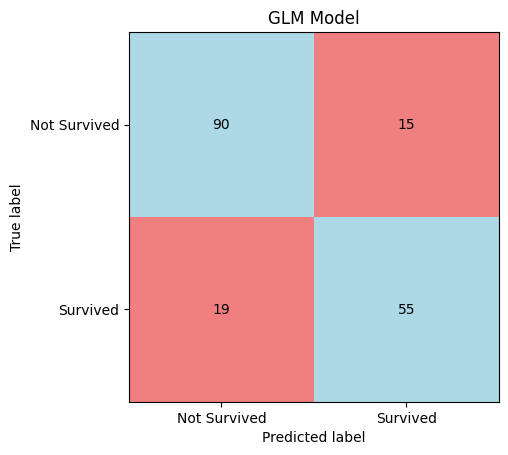

In [13]:
# Train GLM Model
glm_model = sm.GLM(y_train.astype(float), X_train.astype(float), family=sm.families.Binomial())
glm_results = glm_model.fit()

# Display the summary of the GLM model
print(glm_results.summary())

# Predict on the test set
y_predicted = glm_results.predict(X_test.astype(float))

# Convert probabilities to binary predictions
y_predicted_binary = [1 if x > 0.5 else 0 for x in y_predicted]

# Plot the confusion matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, y_predicted, labels=None, title='Confusion Matrix'):
    cm = confusion_matrix(y_test, y_predicted)
    
    # Create a custom colormap: one color for TP+TN, another for FP+FN
    colors = ['lightblue', 'lightcoral']
    custom_cmap = plt.cm.colors.ListedColormap(colors)
    
    # Define a matrix for coloring based on TP, TN, FP, FN
    colored_cm = np.zeros_like(cm, dtype=int)
    for i in range(len(cm)):
        for j in range(len(cm)):
            if i == j:  # TP or TN
                colored_cm[i, j] = 0
            else:  # FP or FN
                colored_cm[i, j] = 1
    
    # Plot the confusion matrix with custom colors
    fig, ax = plt.subplots()
    im = ax.imshow(colored_cm, cmap=custom_cmap)
    
    # Add text annotations
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            color = 'black'  # Text color for better contrast
            ax.text(j, i, cm[i, j], ha='center', va='center', color=color)
    
    # Add axis labels and titles
    if labels is None:
        labels = ['Class 0', 'Class 1']
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    ax.set_title(title)
    
    plt.show()

# Plot the confusion matrix for the GLM model
plot_confusion_matrix(y_test, y_predicted_binary, labels=['Not Survived', 'Survived'], title='GLM Model')

# Evaluate the Model
Evaluate the GLM model using the testing data and calculate metrics such as accuracy, precision, recall, and F1-score.

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predicted_binary)

# Calculate precision
precision = precision_score(y_test, y_predicted_binary)

# Calculate recall
recall = recall_score(y_test, y_predicted_binary)

# Calculate F1-score
f1 = f1_score(y_test, y_predicted_binary)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')

Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1-score: 0.76


# Plot Confusion Matrix
Plot the confusion matrix to visualize the performance of the GLM model.

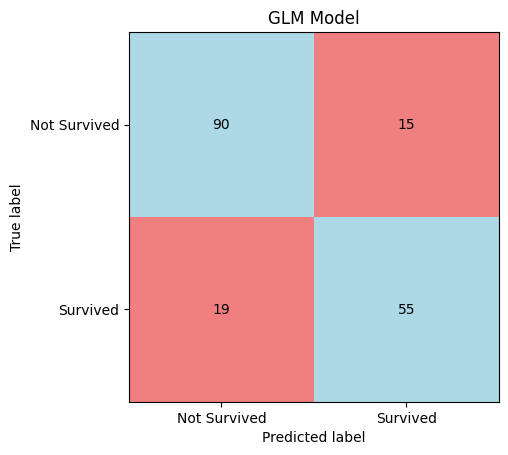

Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1-score: 0.76


In [15]:
# Plot the confusion matrix for the GLM model
plot_confusion_matrix(y_test, y_predicted_binary, labels=['Not Survived', 'Survived'], title='GLM Model')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predicted_binary)

# Calculate precision
precision = precision_score(y_test, y_predicted_binary)

# Calculate recall
recall = recall_score(y_test, y_predicted_binary)

# Calculate F1-score
f1 = f1_score(y_test, y_predicted_binary)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')